<a href="https://colab.research.google.com/github/BEANyyy/BEANyyy.github.io/blob/master/TaLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

In [ ]:
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import talib as ta

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
from ta import *
from ta import add_all_ta_features
from ta.utils import dropna

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import*
from ta.momentum import*
from ta.trend import SMAIndicator

# Load the stock data
stock_data = pd.read_csv("/content/drive/MyDrive/0_Capstone/예빈 작업실/stock_data.csv")

In [ ]:
stock_data

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


이동평균

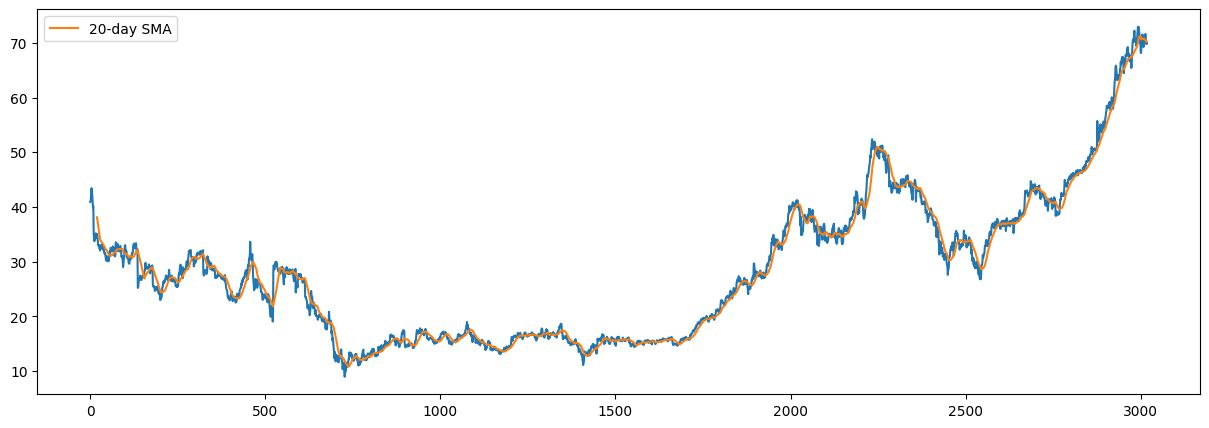

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import*
from ta.momentum import*
from ta.trend import SMAIndicator

# Load the stock data
stock_data = pd.read_csv("/content/drive/MyDrive/0_Capstone/예빈 작업실/stock_data.csv")

# Calculate the SMA using the close prices
sma_class = SMAIndicator(stock_data["Close"], window=20)
sma = sma_class.sma_indicator()

# Plot the stock data and SMA
plt.figure(figsize=(15, 5))
plt.plot(stock_data["Close"])
plt.plot(sma, label="20-day SMA")
plt.legend()
plt.show()

스토케스틱

In [ ]:
from ta.momentum import stoch

stochastic_oscillator = stoch(stock_data["High"], stock_data["Low"], stock_data["Close"], window=14, smooth_window=3, fillna=False)

RSI

In [ ]:
from ta.momentum import rsi

rsi = rsi(stock_data["Close"], window=14, fillna=False)
rsi

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3014    56.037363
3015    47.549885
3016    48.526164
3017    47.386318
3018    47.552159
Name: rsi, Length: 3019, dtype: float64

RSI -> 시그널 변환

In [ ]:
#https://towardsdatascience.com/trading-strategy-technical-analysis-with-python-ta-lib-3ce9d6ce5614
holdings = pd.DataFrame(index=price.index, data={'Holdings': np.array([np.nan] * index.shape[0])})
holdings.loc[((price['RSI'] < 30) & (price['BBP'] < 0)), 'Holdings'] = max_holding
holdings.loc[((price['RSI'] > 70) & (price['BBP'] > 1)), 'Holdings'] = 0
holdings.ffill(inplace=True)
holdings.fillna(0, inplace=True)

볼린저 밴드

In [ ]:
from ta.volatility import BollingerBands
bands = BollingerBands(stock_data["Close"], window=20, window_dev=2, fillna= False)
print(bands)
#upper, middle, lower

macd

In [ ]:
from ta.trend import macd
macd = macd(stock_data["Close"], window_slow=26, window_fast=12, fillna=False)
macd_signal = macd_signal(stock_data["Close"], window_slow=26, window_fast=12, window_sign=9, fillna=False)
macd_hist = macd_diff(stock_data["Close"], window_slow=26, window_fast=12, window_sign=9, fillna=False)

AD

In [ ]:
ad = adx(stock_data["High"], stock_data["Low"], stock_data["Close"], window=14, fillna=False)
#ad = talib.AD(stock_data["High"], stock_data["Low"], stock_data["Close"], stock_data["Volume"])

/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


aroonup, aroondown

In [ ]:
aroon_up=aroon_up(stock_data["High"], window=14, fillna=False)
aroon_down=aroon_down(stock_data["Low"], window=14, fillna=False)

TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
#from trade.util.db_helper import *
from ta.trend import IchimokuIndicator
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 종목코드
code = '010060'
db_name = 'RSIStrategy'

# 300건으로 분석
sql = f"""
SELECT *
FROM (
SELECT `index`, open, high, low, close, volumn as volume FROM `{code}` ORDER BY `index` DESC LIMIT 300
)
ORDER BY `INDEX`
"""

# database에서 일별 거래정보 조회
cur = execute_sql(db_name, sql)

cols = [column[0] for column in cur.description]
df = pd.DataFrame.from_records(data=cur.fetchall(), columns=cols)
df = df.set_index('index')

# 일목균형표 데이터 생성
id_ichimoku = IchimokuIndicator(high=df['high'], low=df['low'], visual=True, fillna=True)
df['span_a'] = id_ichimoku.ichimoku_a()
df['span_b'] = id_ichimoku.ichimoku_b()
df['base_line'] = id_ichimoku.ichimoku_base_line()
df['conv_line'] = id_ichimoku.ichimoku_conversion_line()

# 한글폰트
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
axs = []
axs.append(plt.subplot(gs[0]))
axs.append(plt.subplot(gs[1], sharex=axs[0]))

for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())

# ax. 캔들 차트
ax = axs[0]
x = np.arange(len(df.index))
ohlc = df[['open', 'high', 'low', 'close']].astype(int).values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))
candlestick_ohlc(ax, dohlc, width=0.5, colorup='r', colordown='b')

# 일목균형표 추가
# ax.plot(df.close, label='close', linestyle='solid', color='purple', linewidth=2)
ax.plot(df.span_a, label='span_a', linestyle='solid', color='pink')
ax.plot(df.span_b, label='span_b', linestyle='solid', color='lightsteelblue')
ax.plot(df.base_line, label='base_line', linestyle='solid', color='green', linewidth=2)
ax.plot(df.conv_line, label='conv_line', linestyle='solid', color='darkorange')
ax.grid(True, axis='y', color='grey', alpha=0.5, linestyle='--')
ax.fill_between(df.index, df.span_a, df.span_b, alpha=0.3)

ax.set_title(f'OCI({code}) - 일목균형표')
ax.legend()

# ax2. 거래량 차트
ax2 = axs[1]
ax2.bar(x, df['volume'], color='k', width=0.6, align='center')

plt.tight_layout()
plt.show()


ModuleNotFoundError: ignored